In [2]:
import pandas as pd
import numpy as np

# Home-made functions
#from functions import *
from fn_feature import *
from fn_nltk import *
from fn_results import *

import warnings
warnings.filterwarnings("ignore")

In [3]:
path_kz = 'data/kdt-NLANU-0.01.connlu.txt'
path_en = 'data/en_ewt-ud-dev.conllu'

path_data = [
    path_kz, 
    path_en
    ]

languages = [
    'kazakh',
    'english'
    ]

In [4]:
columns = ["ID", "WORD", "LEMMA", "POS", "XPOS", "MORPH", "HEAD", "DEPREL", "DEPS", "MISC"]

df = pd.read_csv(path_kz,
                sep='\t',
                names=columns,
                skip_blank_lines=True
                )

# run the hand-made function to clean data
df = clean_data(df)

df_ = pd.read_csv(path_en,
                sep='\t',
                names=columns,
                skip_blank_lines=True
                )

# run the hand-made function to clean data
df_ = clean_data(df_)

Size dataset :  (20000, 10)
Size dataset :  (20000, 10)


In [5]:
df

,ID,WORD,LEMMA,POS,XPOS,MORPH,HEAD,DEPREL,DEPS,MISC
1,1,ҚТЖ,ҚТЖ,PROPN,PROPN,_,4,nsubj,_,_
2,2,халықаралық,халықаралық,ADJ,ADJ,_,3,amod,_,_
3,3,серіктестікті,серіктестік,NOUN,NOUN,Case=Acc,4,dobj,_,_
4,4,кеңейтуде,кеңей,VERB,VERB,Person=3|vbTense=Aor|vbVcCaus=True,0,root,_,_
6,1,160,160,NUM,NUM,_,2,compound,_,_
...,...,...,...,...,...,...,...,...,...,...
24711,6,Nakanune.kz,Nakanune.kz,PROPN,PROPN,_,7,appos,_,_
24712,7,сайтында,сайт,NOUN,NOUN,Case=Loc|Poss=3,12,nmod,_,_
24713,8,жалған,жалған,ADJ,ADJ,_,9,amod,_,_
24714,9,мәліметтерге,мәлімет,NOUN,NOUN,Case=Dat|Number=Pl,10,iobj,_,_


In [6]:
# Basic statistics for numerical columns
numerical_stats = df.describe()

# Unique values count for each column
unique_counts = df.nunique()

# Most frequent values in categorical columns
most_frequent_values = df.mode().iloc[0]

# Null/NaN values count for each column
null_counts = df.isnull().sum()

# Value counts for POS and XPOS columns (part-of-speech tags)
pos_counts = df['POS'].value_counts()
xpos_counts = df['XPOS'].value_counts()

# Display all statistics
print("Numerical Statistics:\n", numerical_stats)
print("\nUnique Values Count:\n", unique_counts)
print("\nMost Frequent Values:\n", most_frequent_values)
print("\nNull/NaN Counts:\n", null_counts)
print("\nPOS Tag Counts:\n", pos_counts)
print("\nXPOS Tag Counts:\n", xpos_counts)

Numerical Statistics:
            ID   WORD  LEMMA    POS   XPOS  MORPH   HEAD     DEPREL   DEPS  \
count   20000  20000  20000  20000  20000  20000  20000      20000  20000   
unique     53   8801   4363     13     13    191     52         42      1   
top         2      .      .   NOUN   NOUN      _      0  nmod-poss      _   
freq     1443   1401   1401   6852   6852  10423   1529       2139  20000   

         MISC  
count   20000  
unique      2  
top         _  
freq    16638  

Unique Values Count:
 ID          53
WORD      8801
LEMMA     4363
POS         13
XPOS        13
MORPH      191
HEAD        52
DEPREL      42
DEPS         1
MISC         2
dtype: int64

Most Frequent Values:
 ID                2
WORD              .
LEMMA             .
POS            NOUN
XPOS           NOUN
MORPH             _
HEAD              0
DEPREL    nmod-poss
DEPS              _
MISC              _
Name: 0, dtype: object

Null/NaN Counts:
 ID        0
WORD      0
LEMMA     0
POS       0
XPOS      0

In [ ]:
# Calculate the distribution of POS tags
pos_counts = df['POS'].value_counts(normalize=True) * 100
xpos_counts = df['XPOS'].value_counts(normalize=True) * 100

# Display distribution percentages for each POS and XPOS class
print("POS Tag Distribution (%):\n", pos_counts)
print("\nXPOS Tag Distribution (%):\n", xpos_counts)

# Determine if the dataset is imbalanced based on a threshold (e.g., classes with less than 5% occurrence)
imbalance_threshold = 5.0  # Define your threshold for imbalance

# POS imbalance check
imbalanced_pos = pos_counts[pos_counts < imbalance_threshold]
print("\nImbalanced POS Tags (less than 5% occurrence):\n", imbalanced_pos)

# XPOS imbalance check
imbalanced_xpos = xpos_counts[xpos_counts < imbalance_threshold]
print("\nImbalanced XPOS Tags (less than 5% occurrence):\n", imbalanced_xpos)

POS Tag Distribution (%):
 POS
NOUN     34.260
VERB     20.230
ADJ      10.175
PROPN     8.965
PUNCT     7.005
PRON      5.210
ADP       4.435
AUX       3.630
NUM       2.775
ADV       2.765
SCONJ     0.285
INTJ      0.200
DET       0.065
Name: proportion, dtype: float64

XPOS Tag Distribution (%):
 XPOS
NOUN     34.260
VERB     20.230
ADJ      10.175
PROPN     8.965
PUNCT     7.005
PRON      5.210
ADP       4.435
AUX       3.630
NUM       2.775
ADV       2.765
SCONJ     0.285
INTJ      0.200
DET       0.065
Name: proportion, dtype: float64

Imbalanced POS Tags (less than 5% occurrence):
 POS
ADP      4.435
AUX      3.630
NUM      2.775
ADV      2.765
SCONJ    0.285
INTJ     0.200
DET      0.065
Name: proportion, dtype: float64

Imbalanced XPOS Tags (less than 5% occurrence):
 XPOS
ADP      4.435
AUX      3.630
NUM      2.775
ADV      2.765
SCONJ    0.285
INTJ     0.200
DET      0.065
Name: proportion, dtype: float64


<Figure size 640x480 with 0 Axes>

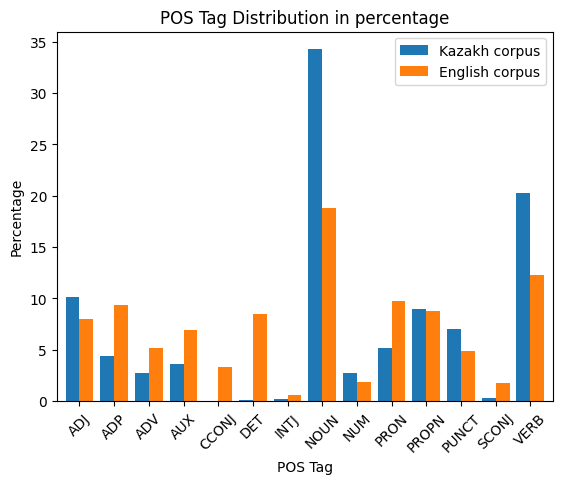

In [ ]:
# Calculate POS and XPOS distributions for both datasets
pos_counts_df = df['POS'].value_counts(normalize=True) * 100
pos_counts_df_ = df_['POS'].value_counts(normalize=True) * 100

xpos_counts_df = df['XPOS'].value_counts(normalize=True) * 100
xpos_counts_df_ = df_['XPOS'].value_counts(normalize=True) * 100

# Combine POS distributions into a single DataFrame for comparison
pos_comparison = pd.DataFrame({
    'df': pos_counts_df,
    'df_': pos_counts_df_
}).fillna(0)  # Fill NaN with 0 for tags that might be missing in either dataset

# Combine XPOS distributions into a single DataFrame for comparison
xpos_comparison = pd.DataFrame({
    'df': xpos_counts_df,
    'df_': xpos_counts_df_
}).fillna(0)

# Plot POS distribution comparison
plt.figure()
pos_comparison.plot(kind='bar', width=0.8)
plt.title("POS Tag Distribution in percentage")
plt.xlabel("POS Tag")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(["Kazakh corpus", "English corpus"])
plt.show()
